| Nama               | NIM        | Kelas   |
| -------------------- | ------------ | --------- |
| Dedy Bayu Setiawan | 2341720041 | TI - 3H |


# 1. Tugas K-Means
# Buatlah sebuah model K-Means dengan ketentuan,


### 1. Gunakan data 'Mall_Customers.csv'

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("data/Mall_Customers.csv")

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)



Dari dataset Mall_Customers.csv, fitur yang paling relevan untuk segmentasi pelanggan adalah:

- Annual Income (k$) → menunjukkan daya beli pelanggan.
- Spending Score (1–100) → menunjukkan perilaku belanja pelanggan.

Kedua fitur ini sering dipakai karena bisa membentuk kelompok pelanggan yang jelas, misalnya:

- High income – high spending (potensial pelanggan premium)
- High income – low spending (hemat walau kaya)
- Low income – high spending (konsumtif)
- Low income – low spending (minim belanja)

### 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

- Menggunakan Elbow Method → melihat titik “siku” pada grafik inertia.
- Menggunakan Silhouette Score → mengukur seberapa baik pemisahan cluster.

c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

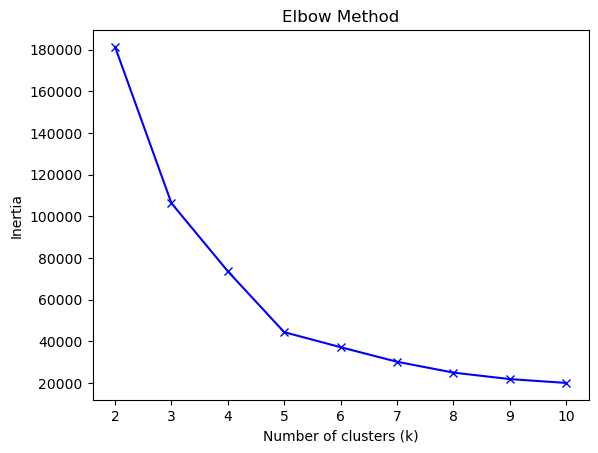

In [22]:
# Pilih fitur untuk clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

k=2, Silhouette Score=0.297
k=3, Silhouette Score=0.468
k=4, Silhouette Score=0.493
k=5, Silhouette Score=0.554
k=6, Silhouette Score=0.540
k=7, Silhouette Score=0.529
k=8, Silhouette Score=0.455


c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dedyb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=9, Silhouette Score=0.456
k=10, Silhouette Score=0.441


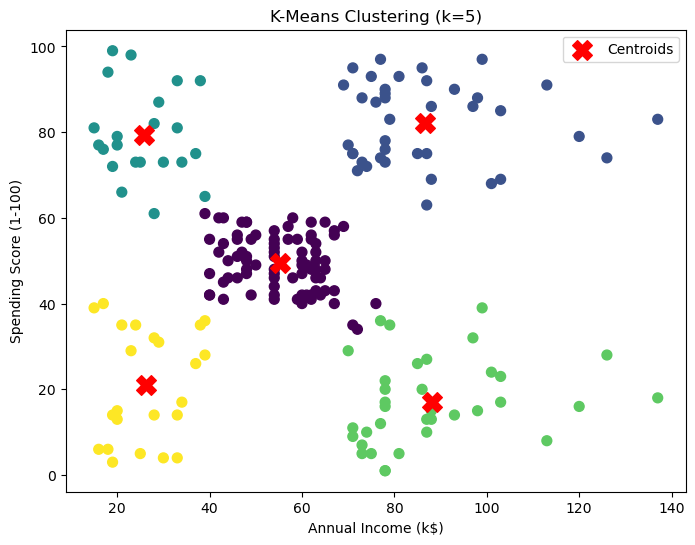

In [23]:
# Silhouette Score
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Model K-Means dengan k terbaik (misal k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], 
            c=df["Cluster"], cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (k=5)")
plt.legend()
plt.show()

# 2. Tugas DBSCAN


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

### 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.



In [26]:
# 1. Buat dataset
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi
X = StandardScaler().fit_transform(X)


### 3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.


In [ ]:
# Fungsi evaluasi DBSCAN
def evaluate_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    
    # Hitung jumlah cluster (tidak termasuk noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = np.nan
    
    metrics = {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters,
        "noise": n_noise,
        "homogeneity": homogeneity_score(y_true, labels),
        "completeness": completeness_score(y_true, labels),
        "v_measure": v_measure_score(y_true, labels),
        "ARI": adjusted_rand_score(y_true, labels),
        "AMI": adjusted_mutual_info_score(y_true, labels),
        "silhouette": silhouette
    }
    return labels, metrics


### 2. Jalankan DBSCAN dengan ```eps=0.2```, ```min_samples=5```, hitung jumlah klaster & noise.



In [28]:
labels, metrics = evaluate_dbscan(0.2, 5)
print(metrics)

{'eps': 0.2, 'min_samples': 5, 'clusters': 2, 'noise': 0, 'homogeneity': np.float64(1.0), 'completeness': np.float64(1.0), 'v_measure': np.float64(1.0), 'ARI': 1.0, 'AMI': np.float64(1.0), 'silhouette': np.float64(0.3911598537138403)}


### 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).


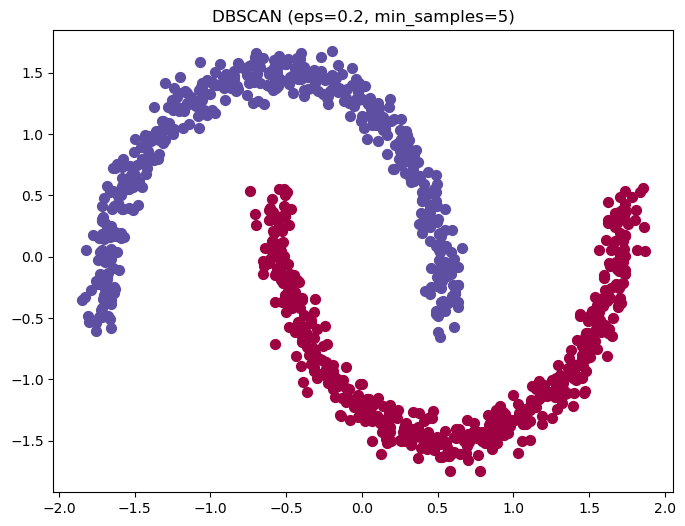

In [29]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[DBSCAN(eps=0.2, min_samples=5).fit(X).core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = hitam
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    
    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], c=[col], s=50, marker='o')
    
    # Border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], c=[col], s=20, marker='o')

plt.title("DBSCAN (eps=0.2, min_samples=5)")
plt.show()

### 5. Lakukan eksperimen:



- ```eps = 0.05, 0.1, 0.3, 0.5```


- ```min_samples = 3, 10, 20```

- Catat perubahan klaster, noise, dan kualitas evaluasi.

In [30]:
results = []
for eps in [0.05, 0.1, 0.3, 0.5]:
    for min_samples in [3, 10, 20]:
        _, metrics = evaluate_dbscan(eps, min_samples)
        results.append(metrics)

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05           10         3    970     0.030669      0.126764   0.049389   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2     14     0.986207      0.902896   0.942714   
4   0.10           10         7     57     0.943317      0.409546   0.571132   
5   0.10           20         6    850     0.153928      0.155466   0.154693   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         2      0     1.000000      1.000000   1.000000   
10  0.50           10         2      0     1.000000      1.000000   1.000000   
11  0.50           20         2      0  